# Contents
* [Importing Libraries](#irl)
* [Loading dataframe](#ldf)
* [Accessing data](#ad)
    * [Checking Missing values](#cmv)
        * [Replacing missing values](#rmv)
        * [Cleaning confirmation](#cc)
    * [Visual Assessment](#va)
        * [Dependent variable distribution](#dvd)
        * [Independent variable distribution](#ivd)
        * [Relations Assessment](#ra)
    * [Outlier Detection](#od)
        * [Outlier Treatment](#ot)
    * [Obtaining ML Model](#omm)
        * [Array Reshaping](#ar)
        * [Linear Regression](#lr)
          * [Model Training](#mtl)
          * [Making Predictions](#mpl)
          * [Model Performance](#mpel)
        * [Random Forest](#rf)
          * [Model Training](#mtr)
          * [Making Predictions](#mpr)
          * [Model Performance](#mper)
          * [Model Comparison](#cm)
      * [Training and Predicted visualization](#tpr)
         



# Importing required libraries 
<a class="anchor" id="irl"></a>





In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


# Reading dataframe csv file 
 <a class="anchor" id="ldf"></a>


In [4]:
df = pd.read_csv("/content/dataframe_.csv")

# Accessing data 
<a class="anchor" id="ad"></a>

         

In [6]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [5]:
df.shape

(1697, 2)

We have an array of 1697 entries, each with two distinct attributes, which is highlighted by the shape command for our datasets.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


The number of records stated by the shape output is 1697, however, there are only 1696 records shown by info output, indicating that one value is absent in our datasets. We will investigate this further as both features possess a float data type.

In [ ]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


Despite having very close minimum and maximum values in both features, there is a noteworthy discrepancy in the mean and standard deviations. The mean of the output feature is -34.088017, which implies a noteworthy number of negative values, distinct from the mean of the input feature, which is 1.159933.

## Missing values check 
<a class="anchor" id="cmv"></a>
### code
---


In [7]:
# missing values
df.isna().sum()

input     1
output    1
dtype: int64

### Replacing missing values with 0 
<a class="anchor" id="rmv"></a>

In [22]:
df_ml = df.copy()
df_ml.fillna(0, inplace = True)

### Cleaning Confirmation 
<a class="anchor" id="cc"></a>

In [23]:
df_ml.isna().sum()

input     0
output    0
dtype: int64

## Visual Assesment 
<a class="anchor" id="va"></a>

### Independent variable distribution 
<a class="anchor" id="ivd"></a>   

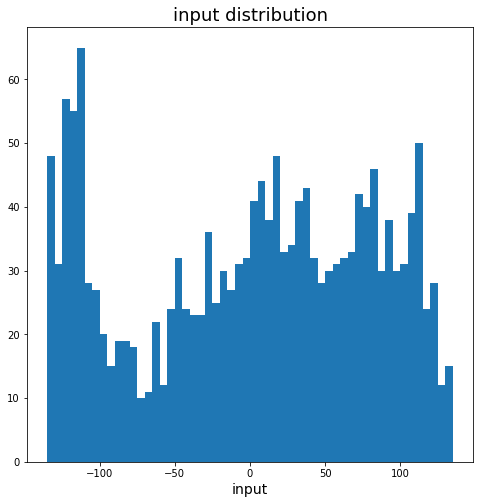

In [24]:
#delay plot function
def dist_plot(col):
   ''' This function plots the histogram based on passed column name'''
   plt.figure(figsize=(8,8))

   # binsize 
   min = df_ml[col].min()
   max = df_ml[col].max()   
   bins = np.arange(min, max + 5, 5)
   plt.hist( data = df_ml, x = col, bins=bins);
  
   plt.title(('{}' + ' distribution').format(col), fontsize=18)
   plt.xlabel('{}'.format(col),fontsize=14)
   plt.show()
    
# Plotting distribution of arrival delay    
dist_plot('input')


### Dependent variable distribution 
<a class="anchor" id="dvd"></a>  

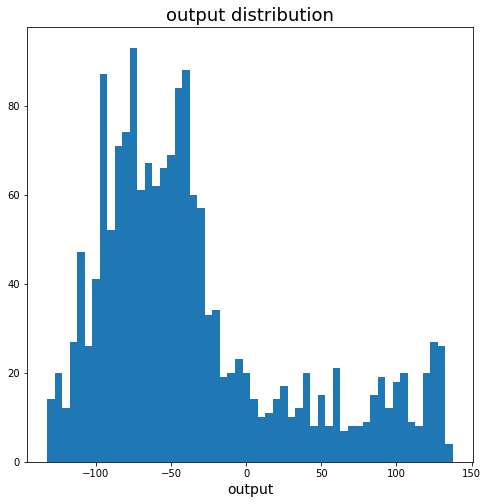

In [19]:
#Output distribution
dist_plot('output')

### Relationship Assesment 
<a class="anchor" id="ra"></a> 


<Figure size 720x576 with 0 Axes>

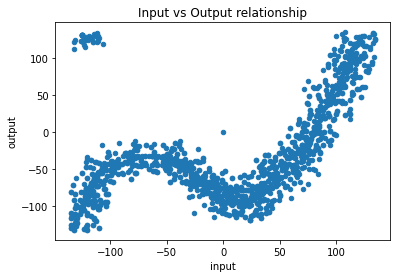

In [25]:
# relationship viz using scatter plot
plt.figure(figsize=[10,8]);
df_ml.plot(kind='scatter', x='input', y='output');
plt.title("Input vs Output relationship");

In [ ]:
df.corr() #correlation coefficients

,input,output
input,1.000000,0.511731
output,0.511731,1.000000


## Outliers detection 
<a class="anchor" id="od"></a>    

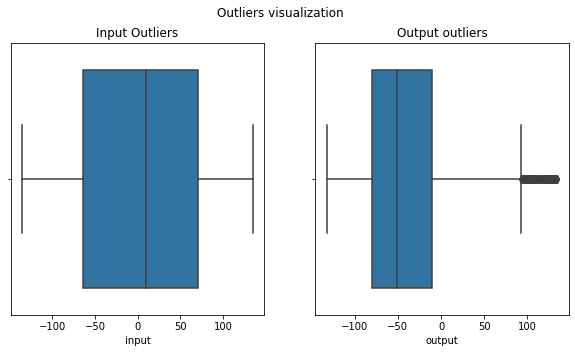

In [26]:
# outlier detection using boxplot
fig, ax= plt.subplots(1,2, figsize=(10,5));
fig.suptitle("Outliers visualization");

sb.boxplot(data=df_ml, x='input', ax =ax[0]);
ax[0].set_title("Input Outliers");

sb.boxplot(data=df_ml, x='output', ax=ax[1]);
ax[1].set_title('Output outliers');


The graph shows that the input datasets is a lot more concentrated above the median in comparison to the output datasets being more distributed below the median point. Additionally, there are also outliers present in the output datasets which would need to be further examined and taken care of.

### Outlier Treatment 
<a class="anchor" id="ot"></a>   

In [31]:
def outlier_handler(df):
  ''' Using IQR method for detecting and capping outliers'''
  # obtaining IQR
  Q1 = df['output'].quantile(0.25)
  Q3 = df['output'].quantile(0.75)
  IQR = Q3 - Q1
  upper_limit = Q3 + 1.5 * IQR
  lower_limit = Q1 - 1.5 * IQR

# Capping outlier
  
  df_ml['output'] = np.where(
    df_ml['output'] > upper_limit,
    upper_limit,
    np.where(
        df_ml['output'] < lower_limit,
        lower_limit,
        df_ml['output']
    )
  )

  return df_ml
df_ml = outlier_handler(df_ml)

<Figure size 720x576 with 0 Axes>

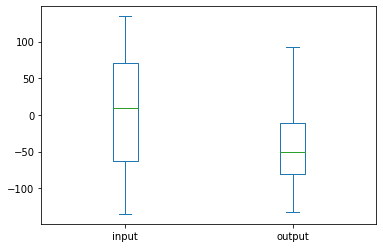

In [34]:
# Confirming outlier treatment
plt.figure(figsize=[10,8]);
df_ml.plot(kind='box');
plt.show()

It is apparent that the extreme values in the produced datasets have been handled appropriately, thus providing us with an ideal dataset for our machine learning program.

## Obtaining ML model 
<a class="anchor" id="omm"></a>  

We will commence by acquiring our datasets for training and evaluation purposes, with 80% of the datasets being utilized for training.

In [37]:
# Extracting model training datasets
x = df_ml.input
y = df_ml.output
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=100)

The format of our data sets depicts a 1D array after the split operation, which would bring about a mistake. Subsequently, as a precautionary measure, we will rearrange it into a 2D-array for further examination.

### Reshaping 1D to 2D array 
<a class="anchor" id="ar"></a>  

In [38]:
# Reshaping arrays
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

x_test = x_test.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

### Linear Regression
<a class="anchor" id="lr"></a>                                  
       

In [39]:
# init
lr = LinearRegression()

#### Training model based on Linear Regression

<a class="anchor" id="mtl"></a>                                    


In [40]:
# Obtaining line of fit
lr.fit(x_train,y_train)

LinearRegression()

#### Making Predictions

<a class="anchor" id="mpl"></a>            
       

In [41]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

#### Evaluate model performance
<a class="anchor" id="mpel"></a>             
        

In [44]:
# train vs train predicted
lr_train_mse = mean_squared_error(y_train,y_lr_train_pred)
lr_train_r2 = r2_score(y_train,y_lr_train_pred)

# test vs test predicted
lr_test_mse = mean_squared_error(y_test,y_lr_test_pred)
lr_test_r2 = r2_score(y_test,y_lr_test_pred)

In [45]:
# Dataframe of evaluation score
lr_results = pd.DataFrame(('Linear Regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2)).transpose()
lr_results.columns = ['Method','Training_MSE','Training_R2','Test_MSE','Test_R2']
lr_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,Linear Regression,2649.496874,0.299139,2748.758381,0.250793


### Random Forest
<a class="anchor" id="rf"></a>            
                        


In [47]:
# init
rf = RandomForestRegressor(max_depth=2,random_state=100)

#### Train model based on Random Forest

<a class="anchor" id="mtr"></a>             
                      

In [48]:
rf.fit(x_train,y_train)

<ipython-input-48-895403b03771>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestRegressor(max_depth=2, random_state=100)

#### Applying model to make predictions

<a class="anchor" id="mpr"></a>             
                              

In [49]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

#### Evaluate model performance

<a class="anchor" id="mper"></a>             
      

In [50]:
# train vs train predicted
rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train,y_rf_train_pred)

# test vs test predicted
rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test,y_rf_test_pred)

In [52]:
# score evaluation dataframe
rf_results = pd.DataFrame(('Random Forest',rf_train_mse,rf_train_r2,rf_test_mse,rf_test_r2)).transpose()
rf_results.columns = ['Method','Training_MSE','Training_R2','Test_MSE','Test_R2']
rf_results

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,Random Forest,1204.706336,0.681324,1396.872668,0.619266


#### Comparing Models
<a class="anchor" id="cm"></a>             
                            

In [53]:
models = pd.concat([lr_results,rf_results], axis=0).reset_index(drop=True)
models

,Method,Training_MSE,Training_R2,Test_MSE,Test_R2
0,Linear Regression,2649.496874,0.299139,2748.758381,0.250793
1,Random Forest,1204.706336,0.681324,1396.872668,0.619266


## Data visualization between predicted and training

<a class="anchor" id="tpr"></a>             

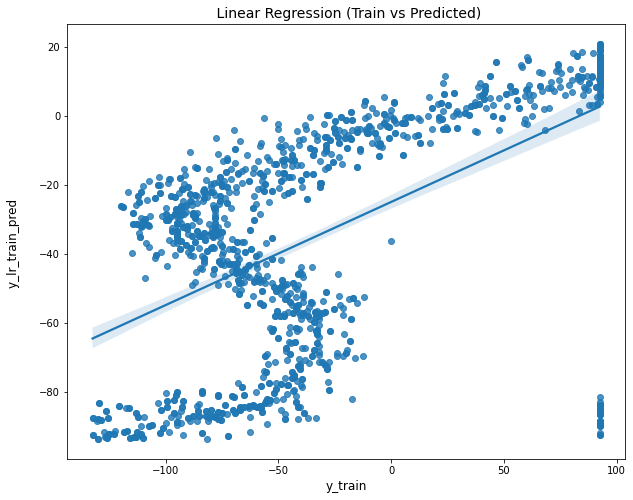

In [63]:
# Linear regression train vs predicted
plt.figure(figsize=[10,8]);
sb.regplot(x=y_train,y=y_lr_train_pred);
plt.xlabel("y_train", fontsize=12);
plt.ylabel("y_lr_train_pred \n", fontsize=12);
plt.title(" Linear Regression (Train vs Predicted)", fontsize=14);

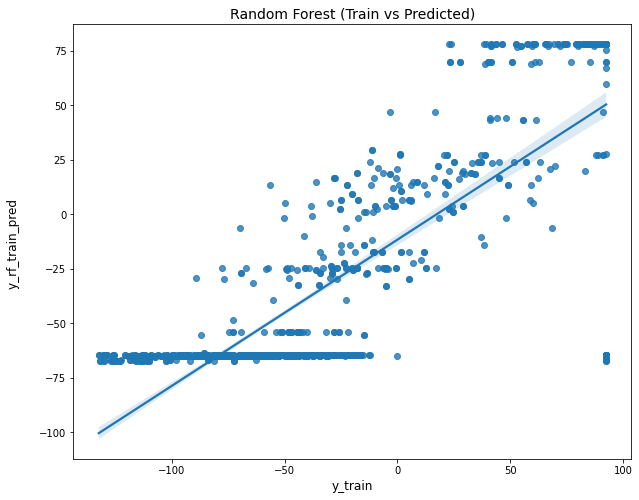

In [62]:
# Random forest train vs predicted
plt.figure(figsize=[10,8]);
sb.regplot(x=y_train,y=y_rf_train_pred);
plt.xlabel("y_train", fontsize=12);
plt.ylabel("y_rf_train_pred \n", fontsize=12);
plt.title("Random Forest (Train vs Predicted)", fontsize=14);

The results provided above are for two different regression models: Linear Regression and Random Forest.

The mean squared error (MSE) is a measure of the difference between the actual and predicted values. A lower MSE indicates a better fit. The Training MSE for the Random Forest model is lower (1204.706336) than that of the Linear Regression model (2649.496874), which means the Random Forest model is likely to be a better fit to the training data.

The R2 score is a measure of the goodness of fit of a model. It ranges from 0 to 1, with 1 indicating a perfect fit. The Training R2 score for the Random Forest model (0.681324) is higher than that of the Linear Regression model (0.299139), which means the Random Forest model is also likely to provide a better fit to the training data.

Same can be seen for the Test MSE and Test R2 score, the Random forest model appears to be better model than the Linear regression model, which suggests that the Random Forest model is still a better fit overall.

In conclusion, based on these results, the Random Forest model appears to be a better fit to the data overall.
